In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
# shape before dropping the ID column
print("The train data size before dropping ID feature is : {} ".format(train.shape))
print("The test data size before dropping ID feature is : {} ".format(test.shape))

The train data size before dropping ID feature is : (8693, 14) 
The test data size before dropping ID feature is : (4277, 13) 


In [6]:
train_ID = train['PassengerId']
test_ID = test['PassengerId']

# Now drop the 'Id' column since it's unnecessary for the prediction process.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

In [7]:
# shape after dropping the ID column
print("\nThe train data size after dropping ID feature is : {} ".format(train.shape))
print("The test data size after dropping ID feature is : {} ".format(test.shape))


The train data size after dropping ID feature is : (8693, 13) 
The test data size after dropping ID feature is : (4277, 12) 


<Axes: >

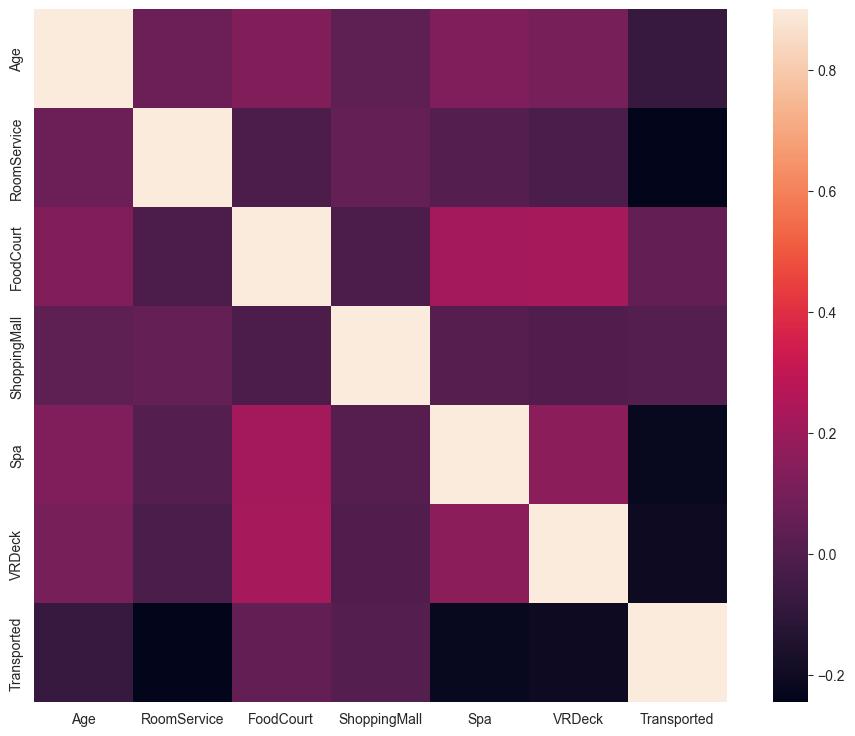

In [8]:
# correration matrix
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [9]:
# concatenate the train and test data in the same dataframe
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Transported.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Transported'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (12970, 12)


In [10]:
# check the missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
CryoSleep,2.390131
ShoppingMall,2.359291
Cabin,2.305320
VIP,2.282190
Name,2.266769
FoodCourt,2.228219
HomePlanet,2.220509
Spa,2.189668
Destination,2.112567
Age,2.081727


Text(0.5, 1.0, 'Percent missing data by feature')

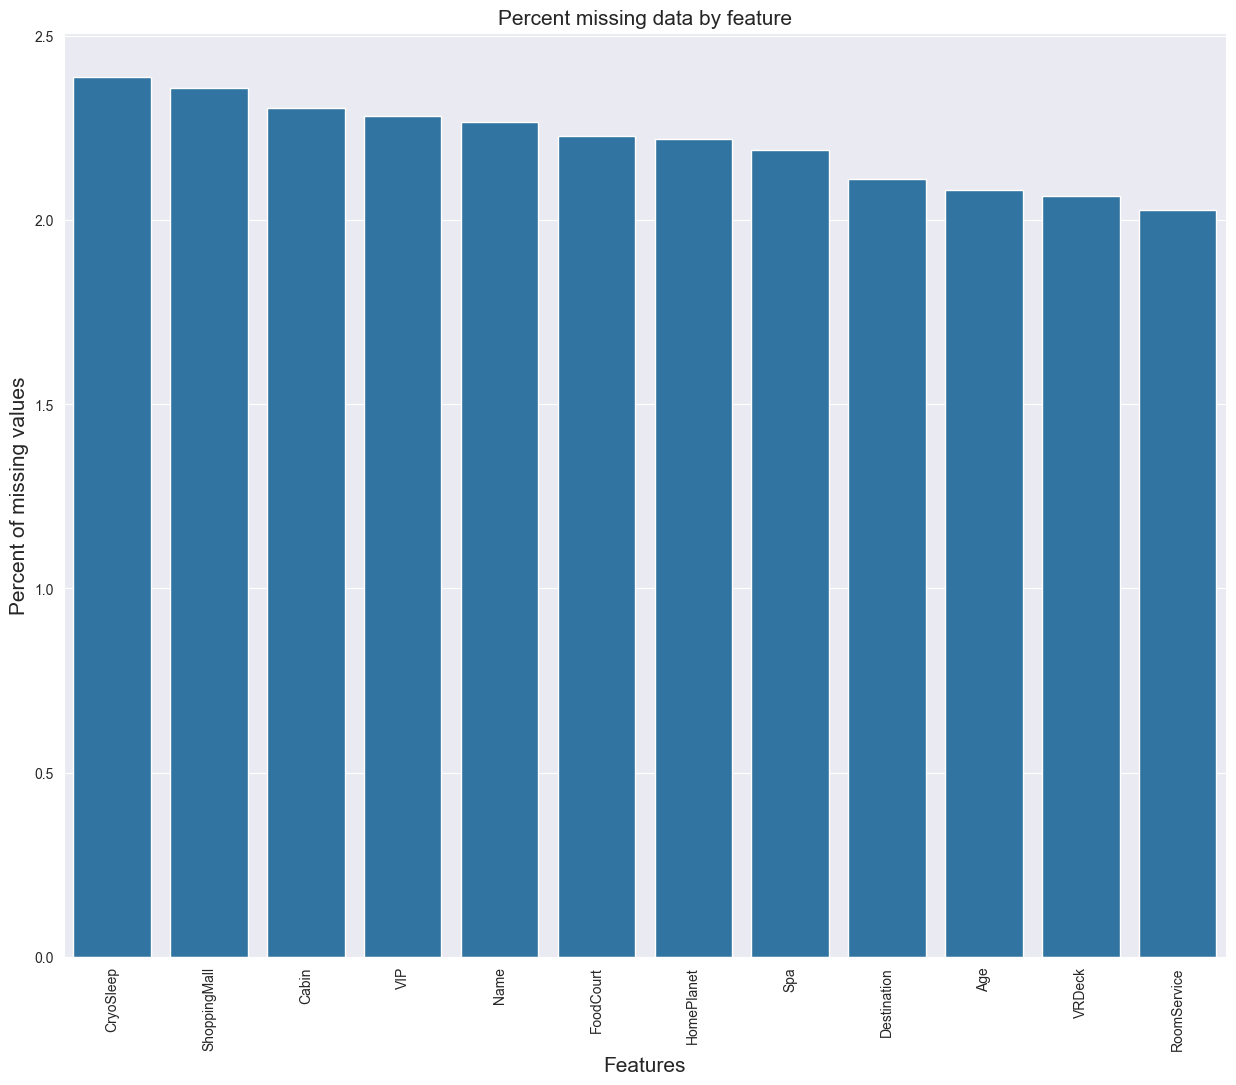

In [11]:
# plot the missing data
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [12]:
# check data types
all_data.dtypes.value_counts()

object     6
float64    6
dtype: int64

In [13]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines


In [14]:
# impute the missing data
# null means no CryoSleep
all_data["CryoSleep"] = all_data["CryoSleep"].fillna(False)
# null means use median value for ShoppingMall
all_data["ShoppingMall"] = all_data["ShoppingMall"].fillna(all_data["ShoppingMall"].median())
# null means "No Cabin" for Cabin
all_data["Cabin"] = all_data["Cabin"].fillna("No Cabin")
# null means false for VIP
all_data["VIP"] = all_data["VIP"].fillna(False)
# drop name
all_data.drop("Name", axis=1, inplace=True)
# null means use median value for FoodCourt
all_data["FoodCourt"] = all_data["FoodCourt"].fillna(all_data["FoodCourt"].median())
# null means use "Earth" value for HomePlanet
all_data["HomePlanet"] = all_data["HomePlanet"].fillna("Earth")
# null means use median value for Spa
all_data["Spa"] = all_data["Spa"].fillna(all_data["Spa"].median())
# null means use "TRAPPIST-1e" value for Destination
all_data["Destination"] = all_data["Destination"].fillna("TRAPPIST-1e")
# null means use median value for Age
all_data["Age"] = all_data["Age"].fillna(all_data["Age"].median())
# null meanse use 0 value for VRDeck
all_data["VRDeck"] = all_data["VRDeck"].fillna(0)
# null means use median value for RoomService
all_data["RoomService"] = all_data["RoomService"].fillna(all_data["RoomService"].median())

In [15]:
# check the missing data
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [16]:
# list data types of the columns
all_data.dtypes

HomePlanet       object
CryoSleep          bool
Cabin            object
Destination      object
Age             float64
VIP                bool
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object

In [17]:
# transform numerical columns that should be categorical
all_data['Age'] = all_data['Age'].astype(str)

In [18]:
# encode the categorical data
from sklearn.preprocessing import LabelEncoder
cols = ('HomePlanet', 'Cabin', 'Destination', 'Age')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (12970, 11)


In [19]:
# add TotalCost column
all_data['TotalCost'] = all_data['ShoppingMall'] + all_data['FoodCourt'] + all_data['Spa'] + all_data['RoomService'] + all_data['VRDeck']

In [20]:
# skewness
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
ShoppingMall,11.126048
VRDeck,8.142285
Spa,7.736207
FoodCourt,7.130414
VIP,6.673130
RoomService,6.200653
TotalCost,4.547106
Age,0.994866
HomePlanet,0.698931
CryoSleep,0.614273


In [21]:
# Box Cox Transformation of (highly) skewed features
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 12 skewed numerical features to Box Cox transform


In [22]:
# get dummies
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(12970, 12)


In [23]:
# split the data
train = all_data[:ntrain]
test = all_data[ntrain:]

In [27]:
# import libraries for classification and cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
# import libraries for measuring accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [41]:
# define cross validation strategy
kfold = StratifiedKFold(n_splits=10)
def cv_score(model):
    score = cross_val_score(model, train.values, y_train, scoring="accuracy", cv=kfold, n_jobs=-1)
    return(score.mean())

In [28]:
# logistic regression
logreg = make_pipeline(RobustScaler(), LogisticRegression())

In [29]:
# support vector machine
svc = make_pipeline(RobustScaler(), SVC())

In [30]:
# random forest
rf = make_pipeline(RobustScaler(), RandomForestClassifier())

In [31]:
# gradient boosting
gb = make_pipeline(RobustScaler(), GradientBoostingClassifier())

In [32]:
# ada boost
ada = make_pipeline(RobustScaler(), AdaBoostClassifier())

In [33]:
# extra trees
et = make_pipeline(RobustScaler(), ExtraTreesClassifier())

In [34]:
# voting classifier
vc = make_pipeline(RobustScaler(), VotingClassifier(estimators=[('lr', logreg), ('svc', svc), ('rf', rf), ('gb', gb), ('ada', ada), ('et', et)], voting='hard'))

In [42]:
# logistic regression score before tuning
logreg_score = cv_score(logreg)
print(logreg_score)

0.7770629472375434


In [43]:
# support vector machine score before tuning
svc_score = cv_score(svc)
print(svc_score)

0.7898342658360117


In [44]:
# random forest score before tuning
rf_score = cv_score(rf)
print(rf_score)

0.7732679920108991


In [45]:
# gradient boosting score before tuning
gb_score = cv_score(gb)
print(gb_score)

0.7887972699496052


In [46]:
# ada boost score before tuning
ada_score = cv_score(ada)
print(ada_score)

0.7829337460153697


In [47]:
# extra trees score before tuning
et_score = cv_score(et)
print(et_score)

0.7714269275028769


In [48]:
# voting classifier score before tuning
vc_score = cv_score(vc)
print(vc_score)

0.7920189675012896
